In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [4]:
train_dl, valid_dl, _ = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

Parsing Graphs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 103.30it/s]


In [5]:
model = Model(4, 20, 2, 0.0)
stats_df = train(model, "./solver/sol_examples/vrp20/sols.pkl", epochs=5, batch_size=16, learning_rate=3e-3, max_instances=2000, max_inference_graphs=100)

Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2285/2285 [00:07<00:00, 323.11it/s]


Train 0 - loss:1.3582, acc:0.5219
Valid 0 - loss:1.2929, acc:0.5627, eval_avg_cost:8.3448


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2285/2285 [00:06<00:00, 342.16it/s]


Train 1 - loss:1.2196, acc:0.5732
Valid 1 - loss:1.2747, acc:0.5754, eval_avg_cost:8.3097


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2285/2285 [00:06<00:00, 335.62it/s]


Train 2 - loss:1.1880, acc:0.5895
Valid 2 - loss:1.2622, acc:0.5806, eval_avg_cost:8.1522


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2285/2285 [00:06<00:00, 336.72it/s]


Train 3 - loss:1.0987, acc:0.6231
Valid 3 - loss:1.0093, acc:0.6676, eval_avg_cost:7.4599


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2285/2285 [00:06<00:00, 331.02it/s]


Train 4 - loss:0.9506, acc:0.6730
Valid 4 - loss:0.9835, acc:0.6738, eval_avg_cost:7.5006


In [6]:
stats_df = stats_df.set_index(["metric", "epoch"]).unstack("metric")["value"]

<AxesSubplot:xlabel='epoch'>

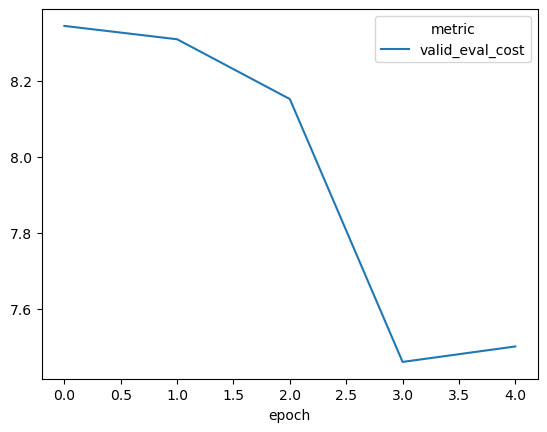

In [7]:
stats_df[["valid_eval_cost"]].plot()

<AxesSubplot:xlabel='epoch'>

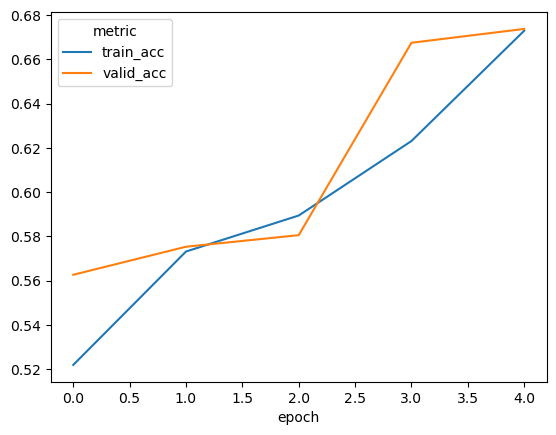

In [8]:
stats_df[["train_acc", "valid_acc"]].plot()

<AxesSubplot:xlabel='epoch'>

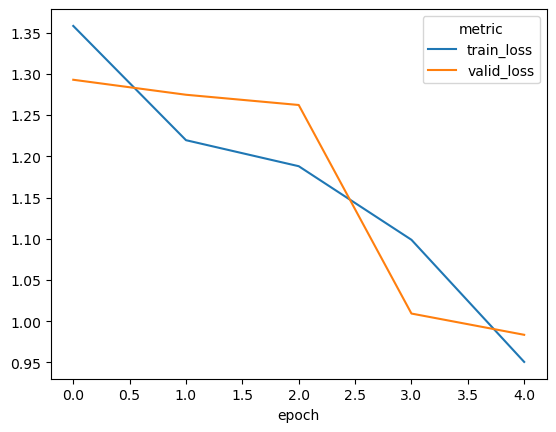

In [9]:
stats_df[["train_loss", "valid_loss"]].plot()

In [19]:
graphs = pd.read_pickle(graphs_path)

In [21]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [22]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

In [23]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[0:1]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    # g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g)
    solved_graphs.append(res_g)

  0%|                                                                                                                                                 | 0/1 [00:00<?, ?it/s]/Users/roberto/Desktop/stanford/cs224w/project/cs224w/graph.py:151: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646991213/work/aten/src/ATen/native/TensorShape.cpp:3281.)
  edge_list = torch.LongTensor(edge_list).T
  0%|                                                                                                                                                 | 0/1 [00:00<?, ?it/s]


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [10]:
graphs = pd.read_pickle(graphs_path)

In [11]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [12]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

In [13]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[0:1]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g)
    solved_graphs.append(res_g)

  0%|                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]

finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10
finished 0
10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.94s/it]

finished 0
10
finished 9
10
finished 1
1


In [14]:
solved_graphs[0].get_full_solution_cost()

6.273439062014093

In [15]:
example_g = solved_graphs[0].get_all_graphs()[-1]

saved


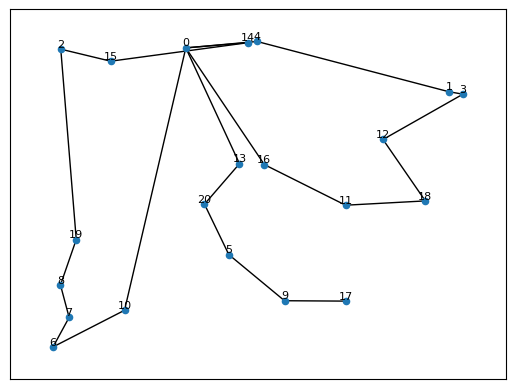

In [16]:
example_g.draw_graph()

In [17]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

NameError: name 'np' is not defined

## Solving graphs

In [3]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single
from util import create_graph_no_sol

In [4]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [5]:
train_dl, valid_dl = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

Parsing Graphs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 105.26it/s]


In [12]:
model = Model(4, 20, 2, 0.0)
train(model, "./solver/sol_examples/vrp20/sols.pkl", epochs=5, batch_size=16, learning_rate=3e-3, max_instances=2000)

0.003


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 294.25it/s]


Train 0 - loss:1.1918, acc:0.5872
Valid 0 - loss:1.0585, acc:0.6409


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 284.91it/s]


Train 1 - loss:1.0033, acc:0.6596
Valid 1 - loss:1.0385, acc:0.6562


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 305.36it/s]


Train 2 - loss:0.9835, acc:0.6676
Valid 2 - loss:1.0111, acc:0.6747


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:06<00:00, 315.54it/s]


Train 3 - loss:0.9719, acc:0.6673
Valid 3 - loss:0.9853, acc:0.6801


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:06<00:00, 316.94it/s]


Train 4 - loss:0.9607, acc:0.6708
Valid 4 - loss:1.0037, acc:0.6746


In [11]:
graphs = pd.read_pickle(graphs_path)

In [12]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [16]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[:100]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

[autoreload of inference failed: Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/roberto/Desktop/stanford/cs224w/project/cs224w/inference.py", line 54


In [17]:
solved_graphs[0].get_full_solution_cost()

7.199907914085822

In [39]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

8.23473345975078